# Problem 7: 3D Histogram

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import csv
from mpl_toolkits.mplot3d import Axes3D

### 2D Plot

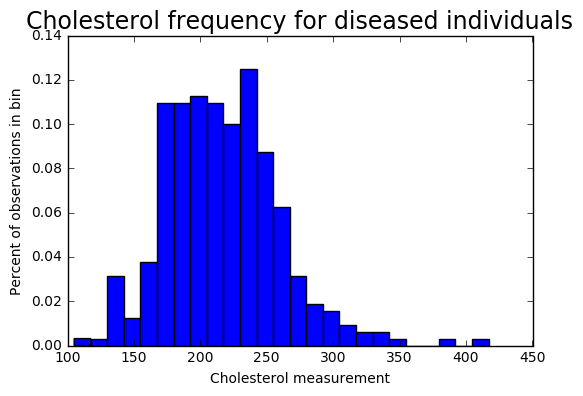

In [40]:
#Note: A new lipids.csv file was saved that removed the text from the beginning of the original file.
lipids = pd.read_csv('lipids.csv')
lipids = lipids[lipids.diseased != 0]
del lipids['diseased']
del lipids['trig']
chol = lipids['chol'].tolist()
chol = np.array(chol)

num_bins = 25
weights = (1 / chol.shape[0]) * np.ones_like(chol)
n, bin_cuts, patches = plt.hist(chol, num_bins, weights=weights)
plt.title('Cholesterol frequency for diseased individuals', fontsize=17)
plt.xlabel(r'Cholesterol measurement')
plt.ylabel(r'Percent of observations in bin')
plt.show()

In [50]:
print(bin_cuts)

[ 105.    117.48  129.96  142.44  154.92  167.4   179.88  192.36  204.84
  217.32  229.8   242.28  254.76  267.24  279.72  292.2   304.68  317.16
  329.64  342.12  354.6   367.08  379.56  392.04  404.52  417.  ]


The bin with the highest frequency is the 11th bin, which has a midpoint of 236.04.

### 3D Plot

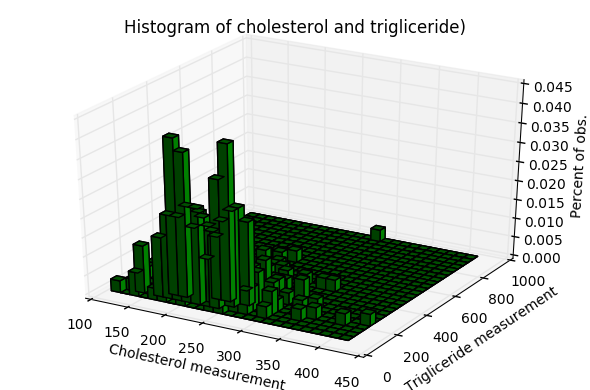

In [48]:
lipids = pd.read_csv('lipids.csv')
lipids = lipids[lipids.diseased != 0]
del lipids['diseased']

chol = lipids['chol']
trig = lipids['trig']

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = int(25)
hist, xedges, yedges = np.histogram2d(chol, trig, bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('Cholesterol measurement')
ax.set_ylabel('Trigliceride measurement')
ax.set_zlabel('Percent of obs.')
plt.title('Histogram of cholesterol and trigliceride)')

plt.tight_layout()
plt.show()

The key new characteristic that emerges is that even though many people with the disease have low levels of cholesterol, these people often have relatively high trigliceride measurements. This fact is not immediately apparent even in the 3D graph because there is a large outlier for the trigliceride measurements. It looks like the groups that have the highest risk for heart disease are those with moderate levels of cholesterol and high levels of triglicerides.

# Problem 8: Comparing Segments of Time Series

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import csv
from mpl_toolkits.mplot3d import Axes3D
from pandas_datareader import data
import datetime

start = datetime.datetime(1929, 1, 1)
end = datetime.datetime(2016, 10, 1)
enda = datetime.datetime(1938, 12, 1)
dates = pd.date_range(start=start, end=end, freq = 'MS')
datesa = pd.date_range(start=start, end=enda, freq='MS')

payems_1929 = 31294
payems_1930 = 29577
payems_1931 = 27027
payems_1932 = 24216
payems_1933 = 24132
payems_1934 = 26084
payems_1935 = 27061
payems_1936 = 28963
payems_1937 = 30705
payems_1938 = 29064

payems1a = np.concatenate((np.repeat(payems_1929, 12), np.repeat(payems_1930, 12), np.repeat(payems_1931, 12), np.repeat(payems_1932, 12), np.repeat(payems_1933, 12), np.repeat(payems_1934, 12), np.repeat(payems_1935, 12), np.repeat(payems_1936, 12), np.repeat(payems_1937, 12), np.repeat(payems_1938, 12)))
payems1 = pd.Series(payems1a, index=datesa)
payems1 = pd.DataFrame({'DATE':payems1.index, 'PAYEMS':payems1.values})
payems1.index = pd.to_datetime(payems1['DATE'])
del payems1['DATE']

payems2 = data.DataReader("PAYEMS", "fred", start, end)
payems = pd.concat((payems1, payems2))

rec = data.DataReader("USREC", "fred", start, end)
data = pd.concat([payems, rec], axis=1)

data[['PAYEMS']] = data[['PAYEMS']].apply(pd.to_numeric)

#Initialize the recession peak dates
rec1 = datetime.datetime(1929, 8, 1)
rec2 = datetime.datetime(1937, 5, 1)
rec3 = datetime.datetime(1945, 2, 1)
rec4 = datetime.datetime(1948, 11, 1)
rec5 = datetime.datetime(1953, 7, 1)
rec6 = datetime.datetime(1957, 8, 1)
rec7 = datetime.datetime(1960, 4, 1)
rec8 = datetime.datetime(1969, 12, 1)
rec9 = datetime.datetime(1973, 11, 1)
rec10 = datetime.datetime(1980, 1, 1)
rec11 = datetime.datetime(1981, 7, 1)
rec12 = datetime.datetime(1990, 7, 1)
rec13 = datetime.datetime(2001, 3, 1)
rec14 = datetime.datetime(2007, 12, 1)


dur1 = 43
dur2 = 13
dur3 = 8 
dur4 = 11
dur5 = 10 
dur6 = 8 
dur7 = 10
dur8 = 11
dur9 = 16
dur10 = 6
dur11 = 16
dur12 = 8 
dur13 = 8
dur14 = 18



In [114]:
#a. Create 14 segments of job growth data series.
import calendar

def add_months(sourcedate,months):
        month = sourcedate.month - 1 + months
        year = int(sourcedate.year + month / 12 )
        month = month % 12 + 1
        day = min(sourcedate.day,calendar.monthrange(year,month)[1])
        return datetime.date(year,month,day)

start = datetime.datetime(1929, 1, 1)
end = datetime.datetime(2016, 10, 1)
dates = pd.date_range(start=start, end=end, freq = 'MS')
dates = list(dates)

start1 = start
start2 = datetime.datetime(1936, 5, 1)
start3 = datetime.datetime(1944, 2, 1)
start4 = datetime.datetime(1947, 11, 1)
start5 = datetime.datetime(1952, 7, 1)
start6 = datetime.datetime(1956, 8, 1)
start7 = datetime.datetime(1959, 4, 1)
start8 = datetime.datetime(1968, 12, 1)
start9 = datetime.datetime(1972, 11, 1)
start10 = datetime.datetime(1979, 1, 1)
start11 = datetime.datetime(1980, 7, 1)
start12 = datetime.datetime(1989, 7, 1)
start13 = datetime.datetime(2000, 3, 1)
start14= datetime.datetime(2006, 12, 1)

starts = [start1, start2, start3, start4, start5, start6, start7, start8, start9, start10, start11, start12, start13, start14]


end1 = add_months(rec1, 84)
end2 = add_months(rec2, 84)
end3 = add_months(rec3, 84)
end4 = add_months(rec4, 84)
end5 = add_months(rec5, 84)
end6 = add_months(rec6, 84)
end7 = add_months(rec7, 84)
end8 = add_months(rec8, 84)
end9 = add_months(rec9, 84)
end10 = add_months(rec10, 84)
end11 = add_months(rec11, 84)
end12 = add_months(rec12, 84)
end13 = add_months(rec13, 84)
end14 = add_months(rec14, 84)

ends = [end1, end2, end3, end4, end5, end6, end7, end8, end9, end10, end11, end12, end13, end14]
series = []

i = 0
while i < 14:
    series.append(data.ix[starts[i]:ends[i]])
    i += 1
    
jobs = [31294, 30705, 41904, 45194, 50536, 53126, 54812, 71240, 77912, 90802, 91602, 109830, 132752, 138413]


In [115]:
#b. Divide each element of a given series by the jobs level at the peak of that series.
dur = [dur1, dur2, dur3, dur4, dur5, dur6, dur7, dur8, dur9, dur10, dur11, dur12, dur13, dur14]

i = 0
segment = series[i]
segment['PAYEMS'] = segment['PAYEMS']/(jobs[i])
segment['MONTHS'] = np.array(range(92))
del segment['USREC']
series[i] = segment
i+=1

while i < 14:
    segment = series[i]
    segment['PAYEMS'] = segment['PAYEMS']/(jobs[i])
    segment['MONTHS'] = np.array(range(97))
    del segment['USREC']
    series[i] = segment
    i += 1
    

/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

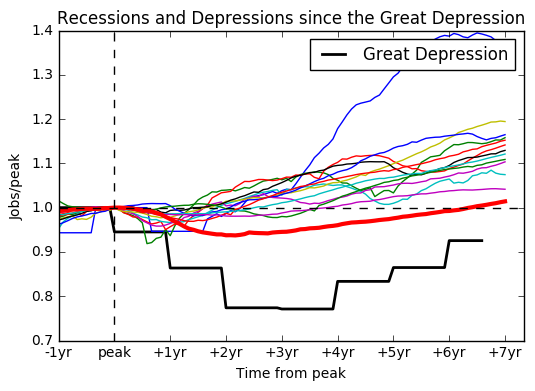

In [143]:
#c. Line plot:
from matplotlib import pyplot as plt 
i = 0
while i < 14:
    if i == 0:
        plt.plot(series[i]['MONTHS'],series[i]['PAYEMS'], linewidth=2, color='k', label = "Great Depression")
    elif i==13:
        plt.plot(series[i]['MONTHS'],series[i]['PAYEMS'], linewidth=3, color='r', label = "Great Recession")
    else:
        plt.plot(series[i]['MONTHS'],series[i]['PAYEMS'])
    i+=1
plt.title("Recessions and Depressions since the Great Depression")
plt.ylabel("Jobs/peak")
plt.xlabel("Time from peak")
x = [0, 12, 24, 36, 48, 60, 72, 84, 96]
labels = ["-1yr", "peak", "+1yr", "+2yr", "+3yr","+4yr","+5yr","+6yr","+7yr"]
plt.xticks(x, labels)
plt.legend(["Great Depression"])
xposition = [12]
yposition = [1.0]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
for yc in yposition:
    plt.axhline(y=yc, color='k', linestyle='--')
plt.show()
    

In terms of jobs, no recession has been worse for the United States than the Great Depression. One way in which the Great Recession has been worse than the Great Depression is in the rate of job growth from the lowest point. Both the depression and recession hit their low point around the 3 year mark after the peak, but the rate of job growth was slower after that for the Great Recession.